In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import plotly
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

In [2]:
#%matplotlib widget
#%matplotlib qt

In [3]:
#pd.set_option('plotting.backend', 'pandas_bokeh')

#pd.options.plotting.backend = "plotly"
#pd.options.plotting.backend = "matplotlib"

In [3]:
def changeDate(inputDate, sToBackWard, sToForward):
    '''
    Given a input date, this function returns the future and past date that is x seconds away. 
    Read the args below to understand more.
    Input:
            inputDate (str): A FLIR thermal image filename, eg: 20220920T110742.MP4
            sToBackWard (int): A number in seconds
            sToForward (int): A number in seconds
    Returns:
            3 strings: Each of which is a date in format %Y-%m-%d %H:%M:%S
            The first string at [0] is the date extracted from the filename
            The second string at [1] is the date extracted-sToBackWard seconds 
            The third string at [2] is the date extracted+sToForward seconds
    '''
    #20220920T110742.MP4
    inputDate = datetime(int(inputDate[:4]), int(inputDate[4:6]), int(inputDate[6:8]), 
                         int(inputDate[9:11]), int(inputDate[11:13]), int(inputDate[13:15]))
    currentTime = inputDate
    ForwardedTime = 0
    ForwardedTime = currentTime+timedelta(seconds=sToForward)
    BackwardedTime = currentTime-timedelta(seconds=sToBackWard)
    return currentTime.strftime("%Y-%m-%d %H:%M:%S"), BackwardedTime.strftime("%Y-%m-%d %H:%M:%S"),ForwardedTime.strftime("%Y-%m-%d %H:%M:%S")

In [4]:
def timeLengthBtwTwoFiles(file1, file2):
    '''
    Given two dates, this functions returns the difference in seconds between them
    Input:
        FLIR File name 1, FLIR file name 2
    Output:
        datetime.timedelta(seconds)
    '''
    inputDate1 = datetime(int(file1[:4]), int(file1[4:6]), int(file1[6:8]), 
                         int(file1[9:11]), int(file1[11:13]), int(file1[13:15]))
    
    inputDate2 = datetime(int(file2[:4]), int(file2[4:6]), int(file2[6:8]), 
                         int(file2[9:11]), int(file2[11:13]), int(file2[13:15]))
    
    return inputDate2-inputDate1

In [5]:
def readFlirVideo(path):
    '''
    Given a _path_, this function will return a _list_ of files with .MP4 format
    '''
    fileList = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".MP4"):
                # in case whole path is needed which I don't think so
                #print(os.path.join(root, file))
                fileList.append(file)
    return fileList

In [6]:
def calorieInInterval(thermalFilePath, csvFilePath, secondsToBackWard, secondsToForward):
    '''
    This function is under construction.
    '''
    
    mp4FileList = readFlirVideo(thermalFilePath)
    for file in mp4FileList:
        
        # TODO: We just need the filename not the path in the first variable below, need to correct it
        cT, preT, postT = changeDate(csvFilePat, secondsToBackWard, secondsToForward)
        
        df = pd.read_csv(csvFilePath, skiprows=[0])
        df.startDate = pd.to_datetime(df.startDate)
        df.endDate = pd.to_datetime(df.endDate)
        df.startDate = df.startDate.dt.tz_convert("US/Eastern")
        df.endDate = df.endDate.dt.tz_convert("US/Eastern")      

In [45]:
df = pd.read_csv("/Users/rishiraj/Documents/thermal-project-data"\
                 "/Calorie-Apple-Watch-19Oct-21Oct.csv",
                skiprows=[0])

In [46]:
df.startDate = pd.to_datetime(df.startDate)
df.endDate = pd.to_datetime(df.endDate)
df.startDate = df.startDate.dt.tz_convert("US/Eastern")
df.endDate = df.endDate.dt.tz_convert("US/Eastern")

74.17299999999999


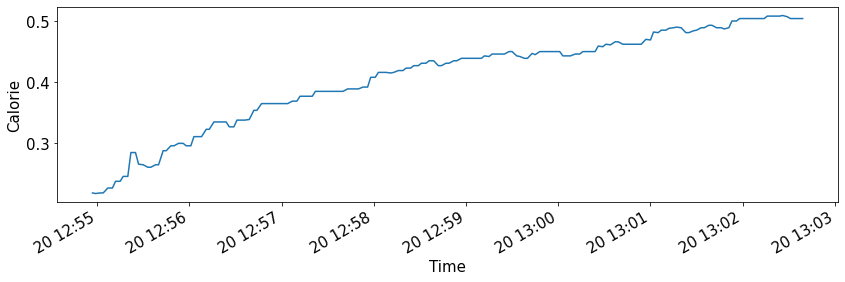

In [47]:
# 1
# filter the date here
df.index = df.startDate



dfInterest = df[ (df.startDate >= '2022-10-20 12:54:55') & (df.startDate <= '2022-10-20 13:02:39')]
# 2022-09-28 16:11:29 to 16:23:55
print(dfInterest.value.sum())

#print(dfInterest[['startDate','endDate','value']].to_string())
#for el in dfInterest.value:
#    print(el,end = '\n')
dfInterest['value'].plot(kind='line', figsize=(14,4), xlabel="Time", ylabel='Calorie');

Some 'active calorie burn' equation are given below:</br>
Men:Calories = ((age_yr*0.2017)+(weight_lb*0.09036)+(heartrate*0.6309) - 55.0969)X(time_min/4.184)

In [78]:
#time_min = 9.8 min
weight = 68*2.205 #lbs
age = 21 
time = 9.8 #in mins
avgHeartRate = (((4.184*74.17)/time)+55.0969-0.2017*age-0.09036*weight)/0.6309
print(avgHeartRate)

109.33376221206507


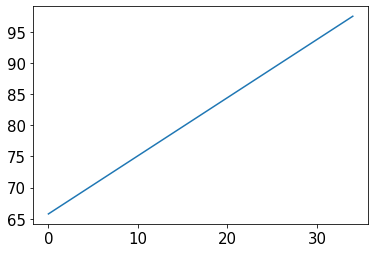

In [84]:
def getcal(age, weight, avgHr, time):
    return ((age*0.2017)+(weight*0.09036)+(avgHr*0.6309)-55.0969)*(time/4.184)


weight = 68*2.205
age = 21
time = 9.8
avgHr= 109.33376221206507

cal_list = [getcal(age, i*2.205,avgHr, time) for i in range(50,120,2)]
plt.plot(cal_list)

<AxesSubplot:xlabel='startDate'>

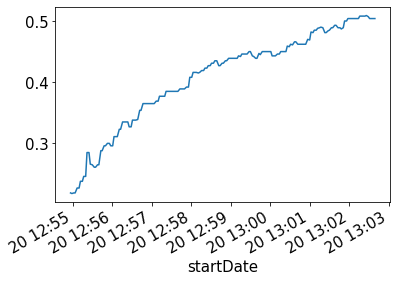

In [38]:
dfInterest['value'].plot()

In [ ]:
# 484 seconds corresponds to 182 datapoints
# 1 second corresponds to 182/484 = 0.37

In [10]:
dfInterest.head()

,type,sourceName,sourceVersion,productType,device,startDate,endDate,unit,value
startDate,,,,,,,,,
2022-10-20 12:54:57-04:00,HKQuantityTypeIdentifierActiveEnergyBurned,Smash’s Apple Watch,7.3.3,"Watch4,1","<<HKDevice: 0x2804b1270>, name:Apple Watch, ma...",2022-10-20 12:54:57-04:00,2022-10-20 12:54:59-04:00,Cal,0.219
2022-10-20 12:54:59-04:00,HKQuantityTypeIdentifierActiveEnergyBurned,Smash’s Apple Watch,7.3.3,"Watch4,1","<<HKDevice: 0x2804b1270>, name:Apple Watch, ma...",2022-10-20 12:54:59-04:00,2022-10-20 12:55:02-04:00,Cal,0.218
2022-10-20 12:55:02-04:00,HKQuantityTypeIdentifierActiveEnergyBurned,Smash’s Apple Watch,7.3.3,"Watch4,1","<<HKDevice: 0x2804b1270>, name:Apple Watch, ma...",2022-10-20 12:55:02-04:00,2022-10-20 12:55:04-04:00,Cal,0.219
2022-10-20 12:55:04-04:00,HKQuantityTypeIdentifierActiveEnergyBurned,Smash’s Apple Watch,7.3.3,"Watch4,1","<<HKDevice: 0x2804b1270>, name:Apple Watch, ma...",2022-10-20 12:55:04-04:00,2022-10-20 12:55:07-04:00,Cal,0.219
2022-10-20 12:55:07-04:00,HKQuantityTypeIdentifierActiveEnergyBurned,Smash’s Apple Watch,7.3.3,"Watch4,1","<<HKDevice: 0x2804b1270>, name:Apple Watch, ma...",2022-10-20 12:55:07-04:00,2022-10-20 12:55:10-04:00,Cal,0.227


In [24]:
dfInterest[['value']].plot()

In [86]:
dfInterest[['value']].shape

(35, 1)

In [21]:
# 'currentTime', 'Second to go back', 'Second to Forward'
changeDate('20220928T155127.MP4',687,0)

('2022-09-28 15:51:27', '2022-09-28 15:40:00', '2022-09-28 15:51:27')

In [21]:
# 'first filename recorded', 'last file recorded'
timeLengthBtwTwoFiles('20221011T125435','20221011T130239').seconds

484

In [23]:
100 samples per second

0.3760330578512397

In [68]:
# 'first filename recorded', 'last file recorded'
timeLengthBtwTwoFiles('20221011T151335','20221011T155036').seconds

2221

In [69]:
2801/60

46.68333333333333

In [70]:
2221/60

37.016666666666666

In [18]:
dfInterest['value'].to_csv("/Users/rishiraj/Documents/thermal-project-data/calorieData/P12_1.csv")